# Menambah Library

Memasukan library yang dibutuhkan dalam projek

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
from os.path import expanduser

# Memuat Model

menggunakan model yang sudah di training sebelumnya dan tersimpan

In [2]:
model = tf.keras.models.load_model('Models/21062024.h5')

c:\Users\Hanif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Daftar Kelas

memasukan semua daftar kelas klasifikasi

In [3]:
daftar_kelas = [
    'Abyssinian',
    'American Curl',
    'American Shorthair',
    'Bengal',
    'Birman',
    'Bombay',
    'British Shorthair',
    'Calico',
    'Domestic',
    'Egyptian Mau',
    'Exotic Shorthair',
    'Khao Manee',
    'Maine Coon',
    'Manx',
    'Munchkin',
    'Norwegian Forest',
    'Ocicat',
    'Persian',
    'Ragdoll',
    'Russian Blue',
    'Scottish Fold',
    'Siamese',
    'Singapura',
    'Sphynx',
    'Tortoiseshell',
    'Turkish Anggora',
    'Tuxedo'
]

# Uji Coba

melakukan klasifikasi menggunakan model yang dimuat

FileChooser(path='C:\Users\Hanif', filename='', title='', show_hidden=False, select_desc='Select', change_desc…

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


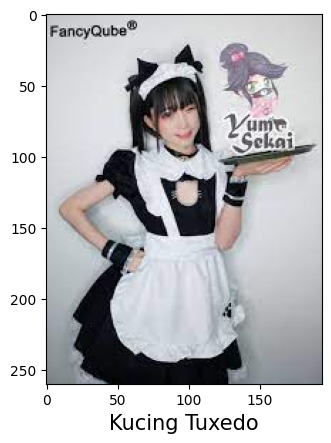

In [4]:
fc = FileChooser(expanduser('~'))
fc.filter_pattern = ['*.jpg', '*.jpeg', '*.png']
display(fc)

def memilih(chooser):
    lokasi = chooser.selected.replace('\\', '/')
    img = tf.keras.utils.load_img(lokasi, target_size=(300, 300))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    jenis = daftar_kelas[tf.argmax(score)]

    display = tf.keras.utils.load_img(lokasi, target_size=None)
    plt.imshow(display)
    plt.xlabel(f'Kucing {jenis}', fontsize=15)
    plt.show()

fc.register_callback(memilih)